## Name: Sihan Chen
## Student ID: <u>14187662</u>

# **Functions needed for calculate runtime and draw graph**

In [84]:
import time
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

def time_it(func:Callable, n:int) -> float:
    """ Return the ms of execution time. """
    start = time.perf_counter()
    result = func(n)
    end = time.perf_counter()
    # default in seconds, convert it to milliseconds for a better view of difference         
    return (end - start) * 1000
    
def get_runtime(func:Callable, input_list: list) -> list:
    result = []
    for n in input_list:
        runtime = time_it(func, n)
        result.append(runtime)
    return result

def compare_time_cost(slow_runtime_list:list, fast_runtime_list:list) -> float:
    """ Compare fast and slow solution, return (slow/fast) as an int. """
    sum_slow = sum(slow_runtime_list) 
    sum_fast = sum(fast_runtime_list)
    print(f"Total time cost for slow solution: {sum_slow:.4f} ms")
    print(f"Total time cost for fast solution: {sum_fast:.4f} ms")
    slow_vs_fast = sum_slow/sum_fast
    print(f"From above calculation, we can see overall the fast solution is roughly {int(slow_vs_fast)} times faster than the slow solution.")
    return slow_vs_fast


def draw_time_graph(n_list:list, runtime_list, title:str):
    x=n_list
    y=runtime_list

    plt.plot(x, y, '-o', markersize=5)
    plt.xlabel("input size (n)")
    plt.xticks(n_list)
    plt.ylabel("runtime (ms)")
    plt.title(title)

# **Question 1**

## <u>Slow solution</u>

In [2]:
def find_the_smallest_evenly_divisible_slow(n: int):
#     upper limit would be n factorial
    factorial = 1
    for i in range(1, n+1):
        factorial *= i
    for i in range(n+1, factorial):
        isResult = True
        for j in range(1, n+1):
            if i % j != 0:
                isResult = False
                break
        if isResult:
            return i   

In [41]:
find_the_smallest_evenly_divisible_slow(8)

840

### <u>Explanation</u>:

First, we calculate and set an upper limit -- n factorial, which gurantees a smaller evenly divisible exist.

Then, we run a loop from **n + 1 to n!**, and for each variable `i` , we will execute a second inner loop using variable `j` from **1 to n**, and calculates the reminder of `i % j`. And if all `j` pass the test, we know `i` is the smallest evenly divisible number.

### <u>Time Complexity Analysis</u>:

```python
def find_the_smallest_evenly_divisible_slow(n: int):
    factorial = 1                         # O(1)
    for i in range(1, n+1):               # O(n)
        factorial *= i                    # O(1)
    for i in range(n+1, factorial+1):     # O(n! - n)
        isResult = True                   # O(1)
        for j in range(1, n+1):           # O(n)
            if i % j != 0:                # O(1)
                isResult = False          # O(1) 
                break 
        if isResult:                      # O(1)
            return i
```

$$\because \text{In terms of time complexity, } (n! - n) \text{ is still considered as } n $$

$$\therefore \text{total time cost is: }O(n + (n!-n)\cdot n) \Rightarrow O(n^2)$$


For $O(n^2)$ time complexity, the theoretical graph would look like this:

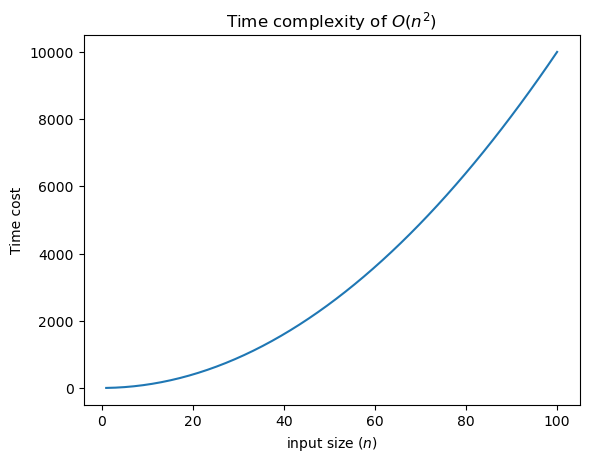

In [102]:
x = np.linspace(1, 100, 50)
y = np.power(x, 2)

plt.figure()
plt.plot(x, y)
plt.xlabel('input size $(n)$')
plt.ylabel('Time cost')
plt.title('Time complexity of $O(n^{2})$')

plt.show()

## <u>Fast solution</u>

In [66]:
def get_primes(n):
    result = [True] * (n + 1)
    # 0 and 1 are not prime number
    result[0] = result[1] = False
    for i in range(2, int(n**(0.5))+1):
        if result[i]:
    # number i is a prime number, remove i**2+n*i
            for j in range(i**2, n+1, i):
                result[j] = False
    return [i for i in range(2, n+1) if result[i]]


def find_the_smallest_evenly_divisible_fast(n: int):
    primes = get_primes(n)
#     print(primes)
    exponentials = {}

    for prime in primes:
        exponentials[prime] = 1

    squart_root_n = int(n**0.5)
    i = 0
    while primes[i] <= squart_root_n:
        i += 1
    first_half_for_check = primes[:i]

    # find power for first half
    for prime in first_half_for_check:
        while prime ** exponentials[prime] <= n:
            exponentials[prime] = exponentials[prime] + 1
        exponentials[prime] = exponentials[prime] - 1

#     print(exponentials)
    result = 1
    for k, v in exponentials.items():
        result *= (k**v)
#     print(result)
    return result


In [68]:
find_the_smallest_evenly_divisible_fast(10)

2520

### <u>Explanation</u>:
<a id='another_cell'></a>
To yield result quicker, we can first analysis what is the requirement for evenly divisible. An evenly divisible number must be able to be divided by all numbers from `1 to n`(inclusive) without leaving any remainder. 

And this question could be break down to find all highest degrees for prime numbers that are smaller than n.

$$ex. \text{From 1 to 15, the highest degree for prime numbers are }[2^3, 3^2, 5^1, 7^1, 11^1, 13^1]$$

And those prime numbers should be categorize into two parts, the first part -- of which its exponential(s) are in range of 1 to n.

$$ex. \text{From 1 to 15, the first part of prime numbers should be [2, 3], since } 2^3 = 8 \lt 15 \text{ and } 3^2 = 9 \lt 15.$$

For the second part, those prime numbers' exponentials are larger than n.

$$ex. \text{For [5, 7, 11, 13], the highest degree of could only be 1, i.e. their square are larger than n.}$$

#### **get_prime(n)**

First, we need to find all prime numbers from 1 to n (inclusive). Here we are using function `get_primes(n)`, it initiate a list `result` which contains `n+1` elements, representing numbers from 0 to n (inclusive), and all elements are set to True as default. Then, we will work our way to change element to false if we find out the number is not a prime (e.g., 4 is not a prime, so `result[4] = false`).

Start of, knowing 0 and 1 are not primes, we change elements at 0 and 1 to fasle. Then we use variable `i` to loop from 2 to $\sqrt{n}$ (inclusive), and if `result[i]` is True (meaning it is a prime), we will change all value from $i^2$ to `n` (inclusive), with interval of `i`, to False. 

For example:

$$ex. \text {get_primes(10), at beginning, the result would look like this}$$

| i | result[0] | result[1] | result[2] | result[3] | result[4] | result[5] | result[6] | result[7] | result[8] | result[9] | result[10] |
|---|---|---|---|---|---|---|---|---|---|---|---|
|  | False | False | True |  True |  True |  True |  True |  True |  True |  True |  True | 

$$\text{After starting the loop, since 2 is prime, numbers at index of range(2**2, 5+1, 2) will change to False. And same goes for i=3.}$$

| i | result[0] | result[1] | result[2] | result[3] | result[4] | result[5] | result[6] | result[7] | result[8] | result[9] | result[10] |
|---|---|---|---|---|---|---|---|---|---|---|---|
| 2 | False | False | True |  True |  False |  True |  False |  True |  False |  True |  False | 
| 3 | False | False | True |  True |  False |  True |  False |  True |  False |  False |  False | 

$$\because int(\sqrt{10}) = 3 \therefore \text{the loop will ends at 3.}$$

Finally, with return statement
```python 
return [i for i in range(2, n+1) if result[i]]
```

we can get 1 to 10(inclusive), prime numbers are [2, 3, 5, 7]

#### **find_the_smallest_evenly_divisible_fast(n)**
After we retrieve prime numbers from 1 to n, we can proceed to separate prime numbers into two parts -- those are smaller or equal to $\sqrt{n}$ and those are not. Using the following codes:
```python
squart_root_n = int(n**0.5)
    i = 0
    while primes[i] <= squart_root_n:
        i += 1
    first_half_for_check = primes[:i]
```

Then update first half prime numbers highest degree as long as the result still in range of n, the codes are:
```python
# find power for first half
for prime in first_half_for_check:
    while prime ** exponentials[prime] <= n:
        exponentials[prime] = exponentials[prime] + 1
    exponentials[prime] = exponentials[prime] - 1
```

Finally, we do a simple calculation by multiply all prime number power by its highest degree:

$$ ex. \text{For 1 to 10, prime numbers are [2, 3, 5, 7], exponentials of highest degree are {2:3, 3:2, 5:1, 7:1}, meaning}[2^3, 3^2, 5^1, 7^1]$$

$$\Rightarrow \text{ the smallest evenly divisible from 1 to 10 is } 2^3 \times 3^2 \times 5^1 \times 7^1 = 2520$$

### <u>Time Complexity Analysis</u>:
```python
def get_primes(n):
    result = [True] * (n + 1)                               # O(n)
    result[0] = result[1] = False                           # O(1)
    for i in range(2, int(n**(0.5))+1):                     # O(n)
        if result[i]:                                       # O(1)  
            for j in range(i**2, n+1, i):                   # O(log(n))
                result[j] = False                           # O(1)
    return [i for i in range(2, n+1) if result[i]]


def find_the_smallest_evenly_divisible_fast(n: int):
    primes = get_primes(n)                                  # O(n*log(n))
    exponentials = {}                                       # O(1)

    for prime in primes:                                    # O(n)
        exponentials[prime] = 1

    squart_root_n = int(n**0.5)                             # O(1)
    i = 0                                                   # O(1)
    while primes[i] <= squart_root_n:                       # O(n)
        i += 1                                              # O(1)
    first_half_for_check = primes[:i]                       # O(n)

    for prime in first_half_for_check:                      # O(n)
        while prime ** exponentials[prime] <= n:            # O(log(n))
            exponentials[prime] = exponentials[prime] + 1   # O(1)
        exponentials[prime] = exponentials[prime] - 1       # O(1)

    result = 1                                              # O(1)
    for k, v in exponentials.items():                       # O(n)
        result *= (k**v)
    return result
```

$$\because \text{Time cost for get_primes(n) is: } O(n \cdot log{n}) \text{, and time cost for find_the_smallest_evenly_divisible_fast(n) is also: } O(n \cdot log{n})$$
$$\therefore \text{Total time cost: } O(n \cdot log{n}) $$

For $O(n \cdot log{n})$ time complexity, the theoretical graph would look like this:

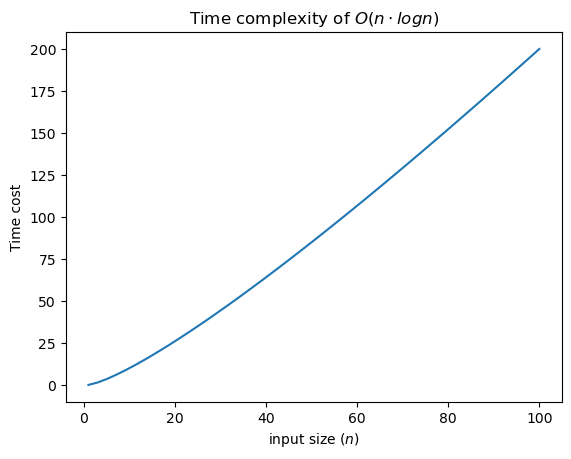

In [103]:
x = np.linspace(1, 100, 50)
y = np.log10(x) * x

plt.figure()
plt.plot(x, y)
plt.xlabel('input size $(n)$')
plt.ylabel('Time cost')
plt.title('Time complexity of $O(n \cdot log{n})$')

plt.show()

## <u>Real Runtime Analysis (Q1)</u>
To draw a runtime graph, we will execute code using input(n) values from 7 to 17 (inclusive), with interval of 1.

In [36]:
n_list_q1 = [i for i in range(5, 15)]

In [58]:
runtime_list_q1_slow = get_runtime(find_the_smallest_evenly_divisible_slow, n_list_q1)
runtime_list_q1_slow

[0.03403599998819118,
 0.03111999990323966,
 0.22619600008511043,
 0.4670470000291971,
 1.388170999916838,
 1.3732449999679375,
 17.306756999914796,
 16.405501999997796,
 208.00674199995228,
 207.09103900003356]

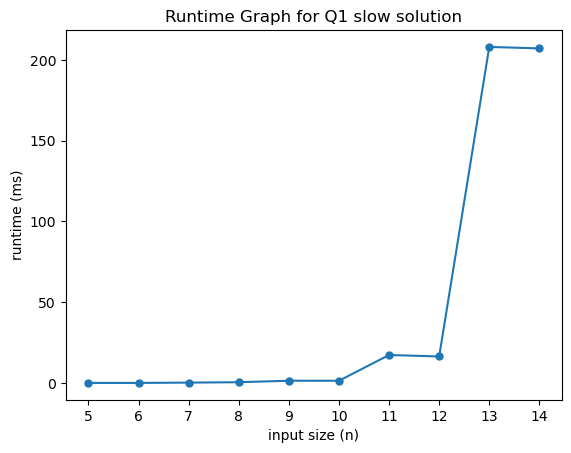

In [176]:
draw_time_graph(n_list_q1, runtime_list_q1_slow, "Runtime Graph for Q1 slow solution")

In [56]:
runtime_list_q1_fast = get_runtime(find_the_smallest_evenly_divisible_fast, n_list_q1)
runtime_list_q1_fast

60
60
420
840
2520
2520
27720
27720
360360
360360


[0.07318600000871811,
 0.016947000176514848,
 0.016656000070724986,
 0.014862999933029641,
 0.01752000002852583,
 0.016316000028382405,
 0.016632000097160926,
 0.016536999964955612,
 0.017769999885786092,
 0.016785999832791276]

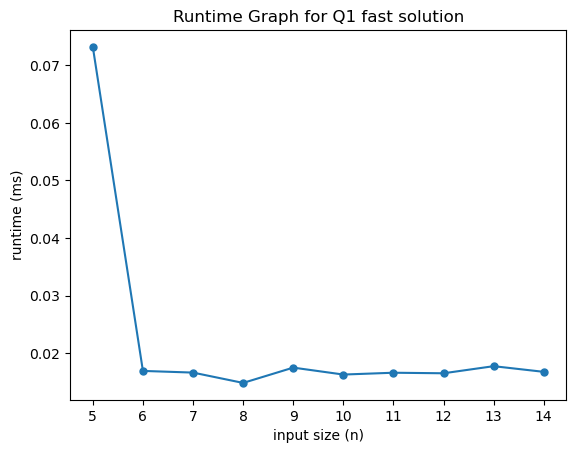

In [175]:
draw_time_graph(n_list_q1, runtime_list_q1_fast, "Runtime Graph for Q1 fast solution")

In [60]:
compare_time_cost(runtime_list_q1_slow, runtime_list_q1_fast)

Total time cost for slow solution: 452.3299 ms
Total time cost for fast solution: 0.2232 ms
From above calculation, we can see overall the fast solution is roughly 2026 times faster than the slow solution.


2026.4494225063336

# **Question 2**

## <u>Slow solution</u>

In [144]:
def find_nth_prime_slow(n: int) -> int:
    """ Return n'th prime number. """
    primes = []
    # start with 2, since 0 and 1 are not prime numbers
    i = 2
    while len(primes) < n:
        isPrime = True
        for j in range(2, int(i**(0.5)+1)):
            if i % j == 0:
                isPrime = False
        if isPrime:
            primes.append(i)
        i += 1
    # exit while loop when collect enough prime numbers,
    # and the last one would be n'th prime
#     print(primes)
    return primes[-1]
                
        

In [13]:
# find sixth prime number, expected value: 13
find_nth_primes_slow(6)

13

### <u>Explanation</u>:

Firstly, we need to know how to check if a number is a prime number.

Let's assume if **n is not a prime**, meaning

$$\exists n = a \cdot b$$ 

$$\Rightarrow \forall n \text{ ,where } n = a \cdot b
\begin{cases} a = b = \sqrt{n}\\ (\exists a \lt \sqrt{n}) \lor (\exists b \lt \sqrt{n}) \end{cases}$$

$$\Rightarrow \text{For all non-prime number } n \text{, one of its divisor must be smaller or equal to } \sqrt{n}$$

$$\Rightarrow \text{if } n \% m \neq 0 \text{ for } m \text{ from 2 to } \sqrt{n} \text{ (inclusive), then } n \text{ is a prime number}$$

And to find n'th prime, we will use a variable `i` with value 2 and increment by 1 for each while loop iteration. Then, we check whether`i` meets the critiria for a prime number, and store it inside list `primes` if i is a prime. 

The while loop will stop when `len(primes)` reaches `n`. And at that point, the last element in `primes` is the n'th prime. 

### <u>Time Complexity Analysis</u>:

```python
def find_nth_primes_slow(n: int) -> int:
    primes = []                                
    i = 2
    while len(primes) < n:                        # O(n)
        isPrime = True                            # O(1)
        for j in range(2, int(i**(0.5)+1)):       # O(n**0.5)
            if i % j == 0:                        # O(1)
                isPrime = False                   # O(1)
        if isPrime:                               # O(1)
            primes.append(i)                      # O(1)
        i += 1                                    # O(1)
    return primes[-1] 
```
$$\therefore \text{Total time cost:  }O(n\cdot \sqrt{n} + 6) \Rightarrow O(n^{1.5})$$

For $O(n^{1.5})$ time complexity, the theoretical graph would look like this:

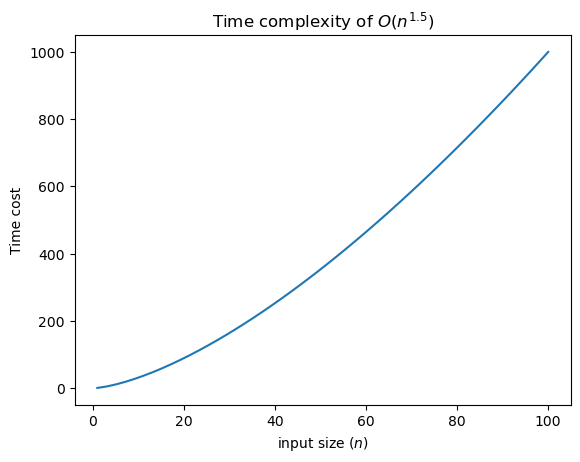

In [101]:
x = np.linspace(1, 100, 50)
y = np.power(x, 1.5)

plt.figure()
plt.plot(x, y)
plt.xlabel('input size $(n)$')
plt.ylabel('Time cost')
plt.title('Time complexity of $O(n^{1.5})$')

plt.show()

## <u>Fast solution</u>

In [178]:
def get_primes(n):
    result = [True] * (n + 1)
    # 0 and 1 are not prime number
    result[0] = result[1] = False
    for i in range(2, int(n**(0.5))+1):
        if result[i]:
    # number i is a prime number, remove i**2+n*i
            for j in range(i**2, n+1, i):
                result[j] = False
    return [i for i in range(2, n+1) if result[i]]

def find_nth_prime_fast(n):
    result = []
#     use 1000 as an interval, until we have enough to find nth prime
    i = 1
    while len(result) < n:
        result = get_primes(1000*i)
        i += 1
    return result[n-1]
    

In [137]:
find_nth_prime_fast(13)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


41

### <u>Explanation</u>:
Using the function we created during [Q1 fast solution](#another_cell) -- `get_prime(n)`. We will first find all primes from 1 to 1000, and if result still less than `n`, then we increase search range by 1000 every time.

i.e. search range: 1-1000, 1-2000, 1-3000, $\cdots$


### <u>Time Complexity Analysis</u>:
As we analyzed before, in [Q1 fast solution](#another_cell). Function `get_prime(n)` has time complexity of $O(n \cdot log{n})$. For `find_nth_prime_fast`:
```python
def find_nth_prime_fast(n):
    result = []                        # O(1)
    i = 1                              # O(1)
    while len(result) < n:             # O(n)
        result = get_primes(1000*i)    # O(n*log(n))
        i += 1                         # O(1)
    return result[n-1]
```

$$\therefore \text{Total time complexity is: } O(n^2 \cdot log{n})$$

For $O(n^2 \cdot log{n})$ time complexity, the theoretical graph would look like this:

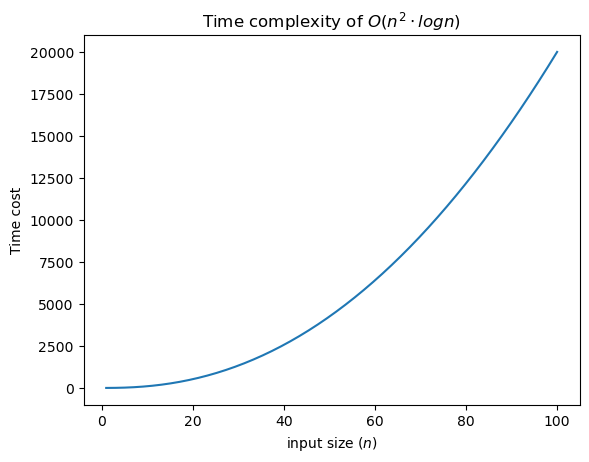

In [182]:
x = np.linspace(1, 100, 50)
y = np.log10(x) * np.power(x, 2)

plt.figure()
plt.plot(x, y)
plt.xlabel('input size $(n)$')
plt.ylabel('Time cost')
plt.title('Time complexity of $O(n^2 \cdot log{n})$')

plt.show()

## <u>Real Runtime Analysis (Q2)</u>
To draw a runtime graph, we will execute code using input(n) values from 1 to 10 (inclusive), with interval of 1.

In [162]:
n_list_q2=[i for i in range(10, 100, 10)]

In [163]:
runtime_list_q2_slow = get_runtime(find_nth_prime_slow, n_list_q2)
runtime_list_q2_slow

[0.035355000363779254,
 0.07283600098162424,
 0.12767700172844343,
 0.255184999332414,
 0.3115130002697697,
 0.41425899871683214,
 0.5545299991354113,
 0.6832380004198058,
 0.7931069994810969]

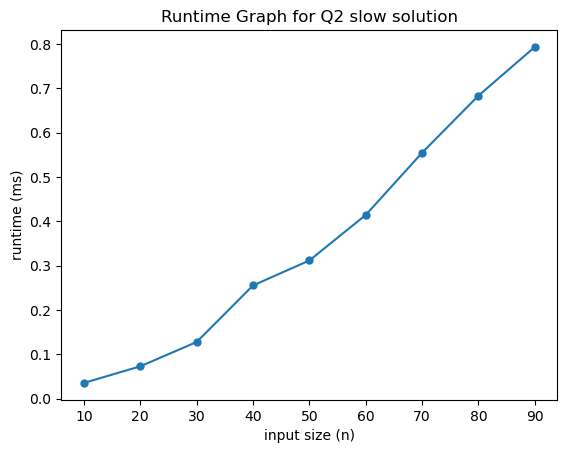

In [174]:
draw_time_graph(n_list_q2, runtime_list_q2_slow, "Runtime Graph for Q2 slow solution")

In [179]:
runtime_list_q2_fast = get_runtime(find_nth_prime_fast, n_list_q2)
runtime_list_q2_fast

[0.17925899919646326,
 0.16576400048506912,
 0.15000600069470238,
 0.16013799904612824,
 0.1955839998117881,
 0.15372400048363488,
 0.14869799997541122,
 0.17321400082437322,
 0.15992300177458674]

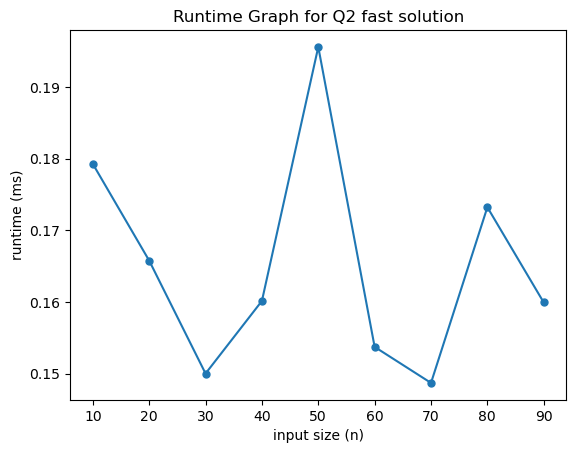

In [180]:
draw_time_graph(n_list_q2, runtime_list_q2_fast, "Runtime Graph for Q2 fast solution")

In [181]:
compare_time_cost(runtime_list_q2_slow, runtime_list_q2_fast)

Total time cost for slow solution: 3.2477 ms
Total time cost for fast solution: 1.4863 ms
From above calculation, we can see overall the fast solution is roughly 2 times faster than the slow solution.


2.185075788644791

# **Question 3**

## <u>Slow solution</u>

In [20]:
def find_pythagorean_triplet_slow(n:int) -> tuple:
    """ Return tuple of (a, b, c) where three integers constitue pythagorean triplet.
        Return None if no triplet is found. """
    for c in range(5, n+1):
        for b in range(4, c):
            for a in range(3, b):
                if a**2 + b**2 == c**2 and a + b + c == n:
                    return (a, b, c)
    return None

In [21]:
# example: find Pythagorean triplet for n = 1000
print(f"For n = 1000, the Pythagorean triplet is: {find_pythagorean_triplet_slow(1000)}")

For n = 1000, the Pythagorean triplet is: (200, 375, 425)


### <u>Explanation</u>:

Here we start loop for a, b, c from 3, 4, 5 as 3, 4, 5 is the smallest Pythagorean triplet.

By defination, a Pythagorean triplet a, b, c means $a \lt b \lt c$ and $a^2 + b^2 = c^2$. So to find such triplet, we will start looping with variable `c` from 5 to n+1, since it is the biggest number. 

For each c we run another loop with variable `b` from 4 to c, and do the same for varaible `a` from 3 to b. Then, we calculate if such a, b, c combination fits critiria, and return tuple `(a, b, c)` if they meet standard.

### <u>Time Complexity Analysis</u>:

```python
def find_pythagorean_triplet_slow(n:int) -> tuple:
    for c in range(5, n+1):                                      # O(n)
        for b in range(4, c):                                    # O(n)
            for a in range(3, b):                                # O(n)
                if a**2 + b**2 == c**2 and a + b + c == n:       # O(2)
                    return (a, b, c)
    return None
```

$$\therefore \text{The total time cost is: } O(n^3 + 2) \Rightarrow O(n^3)$$



For $O(n^{3})$ time complexity, the theoretical graph would look like this:

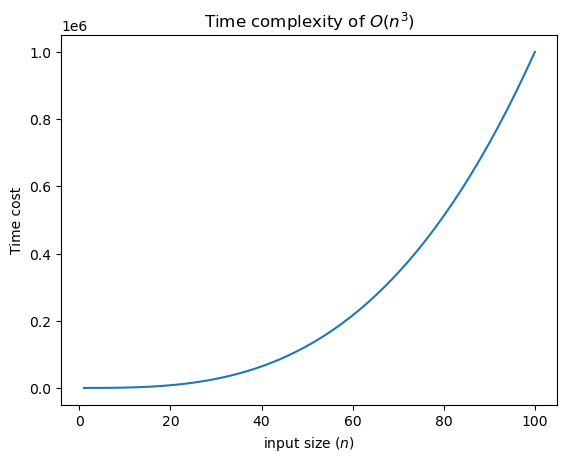

In [99]:
x = np.linspace(1, 100, 50)
y = np.power(x, 3)

plt.figure()
plt.plot(x, y)
plt.xlabel('input size $(n)$')
plt.ylabel('Time cost')
plt.title('Time complexity of $O(n^{3})$')

plt.show()

## <u>Fast solution</u>

In [22]:
def find_pythagorean_triplet_fast(n:int) -> tuple:
    for c in range(5, n//2):
        for b in range(4, c):
            a = n - c - b
            if a**2 + b**2 == c**2 and a + b + c == n:
                    return (a, b, c)
    return None

In [23]:
# example: find Pythagorean triplet for n = 1000
print(f"For n = 1000, the Pythagorean triplet is: {find_pythagorean_triplet_fast(1000)}")

For n = 1000, the Pythagorean triplet is: (375, 200, 425)


### <u>Explanation</u>:

To optimize the previous function, we can apply the knowledge of trigonometry: if a, b, c are Pythagorean triplet, then `c` must be smaller than `a + b`. And this allow us to narrow down the search range of `c` to [5, n//2).

As for a and b, which one is bigger should not concern us, so we can assign either `a` or `b` for the second loop, and just caculate the other one using substitution, knowing $a + b + c = n$.

Lastly, the condition check remain the same.

### <u>Time Complexity Analysis</u>:

```python
def find_pythagorean_triplet_fast(n:int) -> tuple:
    for c in range(5, n//2):                             # O(n)
        for b in range(4, c):                            # O(n)
            a = n - c - b                                # O(1) 
            if a**2 + b**2 == c**2 and a + b + c == n:   # O(2) 
                    return (a, b, c)
    return None
```

$$\therefore \text{Total time cost: } O(n^2) $$

For $O(n^{2})$ time complexity, the theoretical graph would look like this:

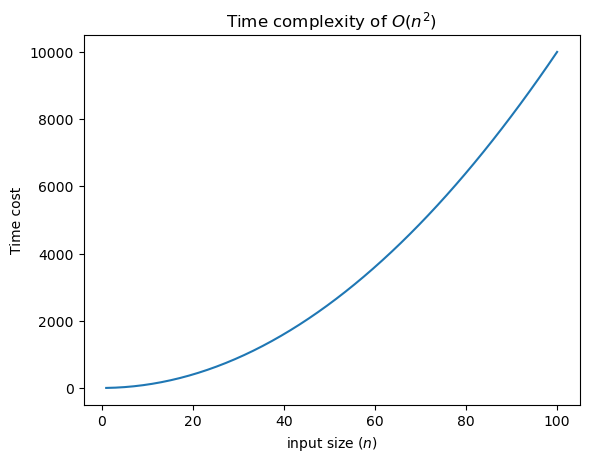

In [100]:
x = np.linspace(1, 100, 50)
y = np.power(x, 2)

plt.figure()
plt.plot(x, y)
plt.xlabel('input size $(n)$')
plt.ylabel('Time cost')
plt.title('Time complexity of $O(n^{2})$')

plt.show()

## <u>Real Runtime Analysis (Q3)</u>
To draw a runtime graph, we will execute code using input(n) values from 100 to 1000 (inclusive), with interval of 100.

In [112]:
n_list_q3=[i for i in range(100, 1001, 100)]

In [25]:
runtime_list_q3_slow = get_runtime(find_pythagorean_triplet_slow, n_list_q3)
runtime_list_q3_slow

[117.55934499990417,
 70.28074699996978,
 231.63388299997223,
 599.8109930000055,
 15811.407671999972,
 1906.457717999956,
 2984.531191999963,
 4770.307724999952,
 6451.980429999935,
 9669.38747100005]

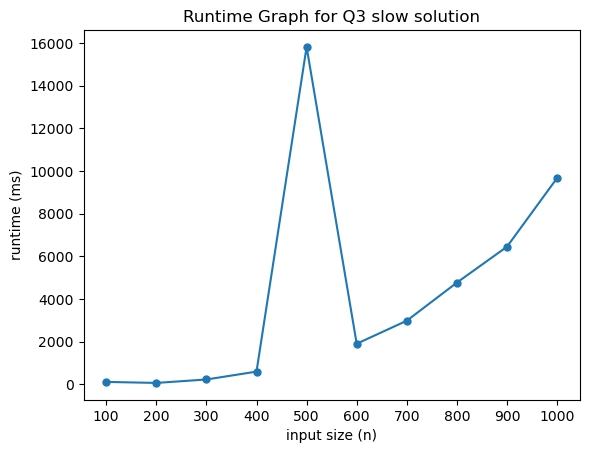

In [172]:
draw_time_graph(n_list_q3, runtime_list_q3_slow, "Runtime Graph for Q3 slow solution")

In [114]:
runtime_list_q3_fast = get_runtime(find_pythagorean_triplet_fast, n_list_q3)
runtime_list_q3_fast

[0.8753890015213983,
 2.646453000124893,
 16.144313998665893,
 12.245218000316527,
 25.073922000956372,
 27.078121000158717,
 34.859524999774294,
 49.513694999404834,
 64.23986200024956,
 76.27984899954754]

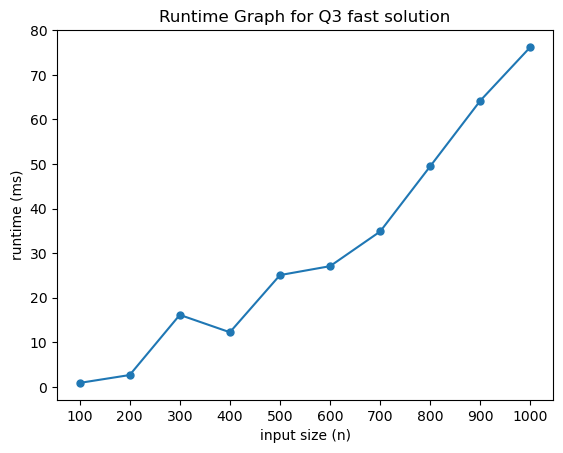

In [171]:
draw_time_graph(n_list_q3, runtime_list_q3_fast, "Runtime Graph for Q3 fast solution")

In [30]:
compare_time_cost(runtime_list_q3_slow, runtime_list_q3_fast)

Total time cost for slow solution: 42613.3572ms
Total time cost for fast solution: 286.4298ms
From above calculation, we can see overall the fast solution is roughly 148 times faster than the slow solution.


148.77419105126307